# Exercise 5: CNN for MNIST data

# Objective : Learning the construction and training of CNN for MNIST data

# Problem : Construct a CNN with the following architecture:
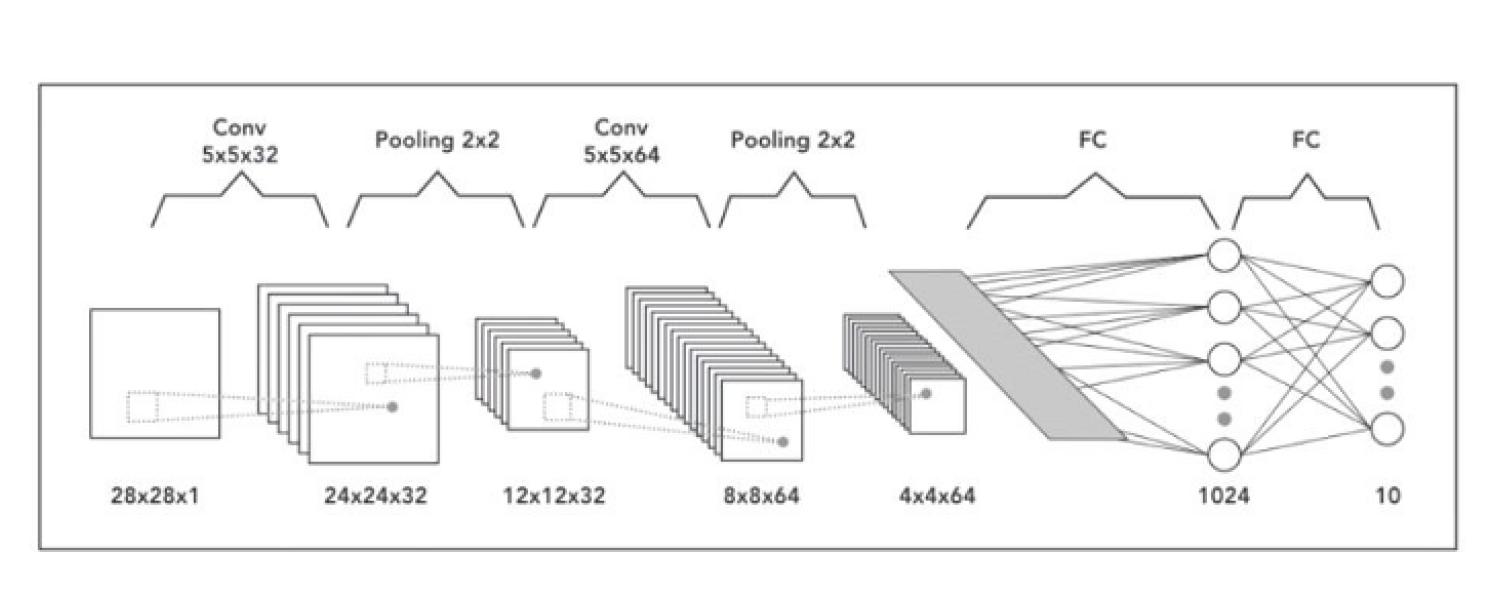

**1. Apply the above CNN for MNIST data set using the first 200 records for training and the first 25 records for testing. <br>2.Compute the accuracy, precision, recall and f1 values<br>3. Compare the performance of the CNN with SVM**

# Step-1 : Construction of CNN suitable for MNIST Data

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Convolution2D(filters=32,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

# Step 2 : Data Preperation

In [ ]:
from keras.datasets import mnist
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


In [ ]:
X_train[10]

## Visualizing an Image

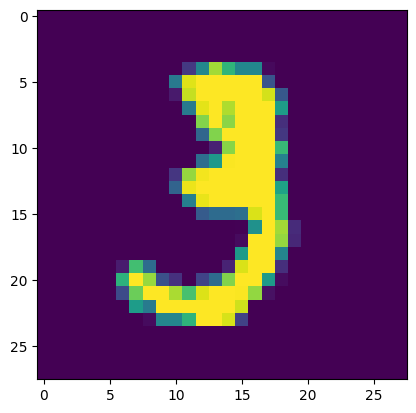

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [ ]:
print(Y_train[0:10])
print(Y_test[0:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [ ]:
X_train=X_train[0:200,]
Y_train=Y_train[0:200,]
X_test=X_test[0:25,]
Y_test=Y_test[0:25,]

In [ ]:
X_train=X_train.reshape(200,28,28,1)
X_test=X_test.reshape(25,28,28,1)

# Step 3: Converting the y column to categorical- The target column of the mnist data contains digits 0,1,2,...,9 which are obviously numeric. Hence it is necessary to convert them to categorical so that the softmax activation can be used without any difficulty

In [ ]:
from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train,10)
Y_test=np_utils.to_categorical(Y_test,10)
Y_train.shape


(200, 10)

# Step 4 : Compiling and Fitting#

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adadelta')

In [ ]:
hist=model.fit(X_train,Y_train,epochs=100)

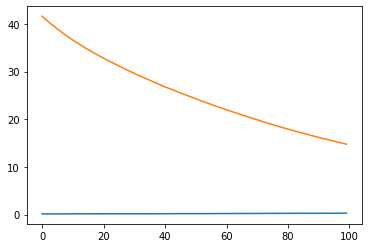

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.show()

# Step 5: Inline Prediction

In [ ]:
import numpy as np
predictions=model.predict(X_train)
pry=np.argmax(predictions,axis=1)
print("Predicted classes are: ",pry)

7/7 [==============================] - 0s 18ms/step
Predicted classes are:  [4 1 2 8 7 2 7 3 7 2 1 3 1 1 9 8 7 5 1 8 2 8 8 8 9 2 2 3 7 9 7 5 7 5 8 2 4
 3 8 7 1 5 8 9 7 5 7 3 9 3 2 3 8 9 3 7 3 8 1 2 4 8 1 1 7 9 1 9 3 1 1 9 9 7
 3 3 4 1 5 8 9 3 2 1 7 5 1 7 4 3 7 7 3 9 9 3 8 5 3 5 3 7 9 8 7 9 2 2 4 9 9
 5 9 5 1 9 7 3 1 1 8 3 2 8 1 4 9 9 9 4 3 9 7 1 4 2 4 2 1 1 5 9 1 7 9 8 5 4
 5 1 1 1 9 8 7 4 3 2 9 2 9 2 5 8 1 4 9 7 8 3 7 4 1 8 9 2 8 1 7 7 9 5 4 5 7
 7 1 4 3 8 7 2 1 2 3 2 8 5 4 2]


In [ ]:
y_ac=np.argmax(Y_train,axis=1)
y_ac

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2])

# Step 6: Computing Precision, Recall and F1 scores

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

p_s1=precision_score(y_ac,pry,average="weighted")
r_s1=recall_score(y_ac,pry,average="weighted")
f_s1=f1_score(y_ac,pry,average="weighted")
print("  Precision:  ", np.round(p_s1,4) ,  "Recall:  " ,r_s1 , " f1_score:  " , np.round(f_s1,4))

# Conclusion: 

# Thus, we constructed a CNN model for MNIST data with metrics as 
#### Precision:   0.3042 ; Recall:   0.28  ; f1_score:   0.2601